<a href="https://colab.research.google.com/github/inessa3/DMML2020_Tesla/blob/main/4_Improving_LR_with_TFIDF%2BOther_classifier_%2B_conclusion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://upload.wikimedia.org/wikipedia/commons/7/77/Logo_HEC_Lausanne.png' width="200">

# Explanation
This is the fourth notebook of our project. It representes more iteration to improve our accuracy score. This time, we decided to apply the TFIDF as well as CountVectorizer to proceed with predictions.

**Training data**

We have tried to clean more the training data using Regular expression operations and made the subsequent predictions on unlabelled test data.

Firstly, we used TFIDF vectorizer for logistic regression as a classifier. And for the last 2 new classifiers, kNN and decision trees, we used a count vectorizer as a bag of words approach. By using a count vectorizer, we emphasize keywords that appear more often. This means that the number of occurrences indicate the importance of a word.

**Predictions**

We applied the following models to build predictions:

* LR with Grid-Search
* LR with PCA
* k-nearest neighbour (kNN)
* Decision Trees


**Results**

Unfortunately, our accuracy decreased with this data cleaning method and with all classifiers. Therefore, we are not going to submit it.

**Conclusion**

To conclude with, we made a table with all the scores we got while working on the project and we also presented it graphically. As logistic regresssion outperfomed the 2 other classifiers, we decided to show it with a separate line graph too.

##Import Libraries


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
import seaborn as sns
sns.set_style("white")
import time

In [ ]:
import nltk, re, pprint
from nltk import word_tokenize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report  

##Download Data

In [ ]:
#Training Data
df = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/cleaned_data.csv", error_bad_lines=False)
df

,id,keyword,location,text,target
0,3738.0,destroyed,USA,black eye : a space battle occurred at star in...,0.0
1,853.0,bioterror,NaN,fedex no longer to transport bioterror germs i...,0.0
2,10540.0,windstorm,"Palm Beach County, FL",reality training: train falls off elevated tra...,1.0
3,5988.0,hazardous,USA,grace: expect that large rocks trees mud unsta...,1.0
4,6328.0,hostage,Australia,new isis video: isis threatens to behead croat...,1.0
...,...,...,...,...,...
6382,4377.0,earthquake,ARGENTINA,m . - e of anchorage alaska: -- :: -- :: -: ...,1.0
6383,3408.0,derail,NaN,totally agree.she is and know what birth contr...,0.0
6384,9794.0,trapped,NaN,hollywood movie about trapped miners released ...,1.0
6385,10344.0,weapons,Beirut/Toronto,friendly reminder that the only country to eve...,1.0


In [ ]:
#Test Data
df_test_data = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/test_data.csv")
df_test_data.head()

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball


 # 1.Training with TF-IDF vectorizer and logistic regression

Now, we split data into a training set and a test set.

In [ ]:
# Select variables
X = df.text
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
X_train

2357              various issues fail to derail homes bid
5508    baltimore city : i- north at mp . (fort mchenr...
5092    i feel your pain. survivors will look back on ...
5931           ron &amp; fez - dave high school crush via
1537    || so.... i just watched the trailed for the d...
                              ...                        
2885    . felt remorse for missing pam drowned it with...
3941             that always good for a pretty explosion.
5166                   hour parade like people collapsed.
5907    christian attacked by muslims at the temple mo...
4568    catching up on gbbo and omg that girls cake th...
Name: text, Length: 5109, dtype: object

We copy again our *data_cleaner* function from the third notebook in order to use it further when we define the vectorizer.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def data_cleaner(tweet):
    
    # remove digits
    tweet= re.sub(r"\d+","", tweet)
    
    
    # remove punctuation
    tweet = re.sub(r"[^\w\s\d]","", tweet)

    # remove HTML
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # remove stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    # remove all the rest
    tweet = re.sub(r"'/#\w+\s*/'", "", tweet)
    tweet = re.sub(r"\x89Û_[\w\_]+", "", tweet)
    tweet = re.sub(r"\x89ÛÒ[\w\_]+", "", tweet)
    tweet = re.sub(r"\@[\w\_]+", "", tweet)
    tweet = re.sub(r"\åÊ[\w\_]+", "", tweet)
    tweet = re.sub(r"\åÈ[\w\_]+", "", tweet)
    tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    

    #\w will match alphanumeric characters and underscores
    #[^\w] will match anything that's not alphanumeric or underscore
    tweet = re.sub(r'[^\w]', ' ', tweet)  
    tweet= re.sub(r"youûªre", "you are", tweet)
    tweet = re.sub(r"û_", " ", tweet) 
    tweet = re.sub(r"û÷firstûª", "first", tweet) 
    tweet = re.sub(r"û÷secondûª", "second", tweet) 
    tweet = re.sub(r"reû_", " ", tweet) 
    tweet = re.sub(r"owenrbroadhurst", "owner broad hurst", tweet) 
    tweet = re.sub(r"histû_", "history", tweet) 
    tweet = re.sub(r"yrs", "years", tweet) 
    tweet = re.sub(r"beû_", " ", tweet) 
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"û_", "", tweet) 
    tweet = re.sub(r"[ ìñ ]", " ", tweet)  
    tweet = re.sub(r"^oo^", " ", tweet) 
    tweet = re.sub(r"-: hs tryout: :-", "", tweet) 
    tweet = re.sub(r"answerû_", "answer", tweet) 
    tweet = re.sub(r"tbh", "to be honest", tweet) 
    tweet = re.sub(r"swea", "swear", tweet) 
    tweet = re.sub(r"	rt ", "retweet", tweet)
    tweet = re.sub(r"yessum", "yes I am", tweet) 
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"nw ", "new", tweet) 
    tweet = re.sub(r" heûªs", "he is", tweet) 
    tweet = re.sub(r"ûïsippinûª", "spinning", tweet) 
    tweet = re.sub(r"yall", "you all", tweet) 
    tweet = re.sub(r"ppl", "people", tweet) 
    tweet = re.sub(r"sometimesi", "sometimes", tweet) 
    tweet = re.sub(r"chinaûªs", "China", tweet) 
    tweet = re.sub(r"todayûªs ", "today's", tweet) 
    tweet = re.sub(r"newû_", "new", tweet) 
    tweet = re.sub(r"theyûªd", "they", tweet) 
    tweet = re.sub(r"davidû_", "David", tweet) 
    tweet = re.sub(r"buildingsûówe", "buldings", tweet)
    tweet = re.sub(r"offensiveû_", "offensive", tweet) 
    tweet = re.sub(r"bloodûª", "blood", tweet) 
    tweet = re.sub(r"bc", "because", tweet) 
    tweet = re.sub(r"tabû_", "tablet", tweet) 
    tweet = re.sub(r"bagsûª", "bags", tweet) 
    tweet = re.sub(r"û÷body", "body", tweet)
    tweet = re.sub(r"byû_", "by", tweet) 
    tweet = re.sub(r"decisionû_", "decision", tweet) 
    tweet = re.sub(r"canûªt ", "can't", tweet) 
    tweet = re.sub(r"australiaûªs ", "Australia's", tweet) 
    tweet = re.sub(r"didn", "didn't", tweet) 
    tweet = re.sub(r"hiûótech", "high tech", tweet) 
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"hollyw...", "Hollywood", tweet)
    tweet = re.sub(r"rt", "", tweet)
    # Tokenize
    tweet = word_tokenize(tweet)
    
    # Stemming
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet]
    
    return tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Here, we are going to vectorize the train-test split data with Tfidf with the following hyper-parameters:


*   sublinear_tf=True
*   tokenizer=data_cleaner
*   min_df=2 
*   max_df=0.9





In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, tokenizer=data_cleaner, min_df=2, max_df=0.9)

# Fit and transform
X_train_vec = tfidf.fit_transform(X_train).toarray()
X_test_vec = tfidf.transform(X_test).toarray()
print(X_train_vec.shape)
X_train_vec

(5109, 3683)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##Predictions

###1.Grid-Search

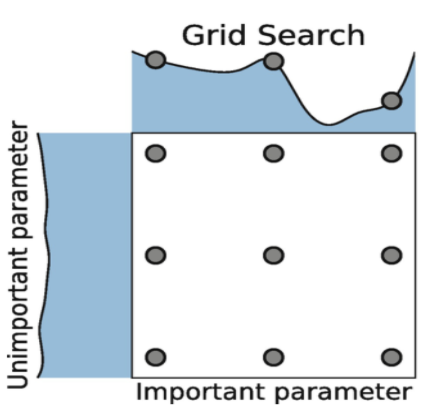</center>

Grid-search is a technique used for hyperparameter tuning.

Hyperparameters are the determinants of a classifier, i.e. how a classifier runs. In contrast, parameters are say something about the data, most often about it's distribution. With grid-search, we want to tune the hyperparameters, i.e. find the optimal one.

Grid-search is an extensive classifier. This means it does compute all possible states to find the optimal solution. In contrast, random algorithms try to find the right hyperparameters based on a random search. So, grid-search is a very expensive algorithm, i.e. it takes more time to compute.

Here, we applied grid-search in combination with cross-validation to find the optimal hyperparameters for the logistic regression classifier.

Image source: https://medium.com/@cjl2fv/an-intro-to-hyper-parameter-optimization-using-grid-search-and-random-search-d73b9834ca0a

In [ ]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])

param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty' : ['l1', 'l2'],
        'classifier__C' : np.logspace(-4, 4, 20),
        'classifier__solver' : ['liblinear']
    },
]

grid_search = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
result = grid_search.fit(X_train_vec, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   29.2s finished


In [ ]:
result.score(X_test_vec, y_test)

0.7942097026604069

Here we can see the best parameters for our classifier.

In [ ]:
result.best_params_

{'classifier': LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 1.623776739188721,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [ ]:
best_lr = result.best_params_['classifier'].fit(X_train_vec, y_train)

With help of classification report we are able to see accuracy and f1-score. 

In [ ]:
print(classification_report(y_test, best_lr.predict(X_test_vec)))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       762
         1.0       0.77      0.70      0.73       516

    accuracy                           0.79      1278
   macro avg       0.79      0.78      0.78      1278
weighted avg       0.79      0.79      0.79      1278



###2.PCA

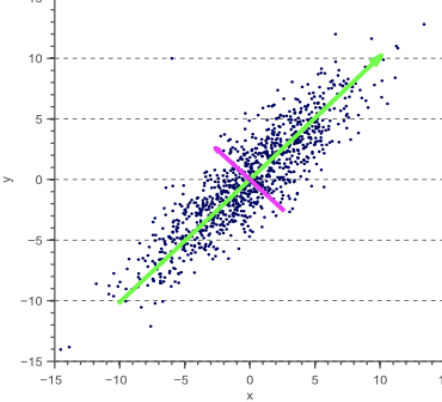

Principle Component Analysis (PCA) is a technique used to reduce the dimensionality of the data.

This has two advantages. 
1. It saves us from having a sparse feature space. This becomes a problem when we use classifiers which by their architecture work best with a dense feature space. One example of such a classifier is Logistic Regression.
2. It speeds up computing the regression by a lot. Instead of having to calculate big matrices, the algorithm now has to deal only with small matrices.


PCA does not work with feature elimination, i.e. just dropping features that seems unimportant. Instead it uses feature extraction, which creates new independent variables from the combination of existing variables.

Image source: https://medium.com/analytics-vidhya/a-deep-dive-into-principal-component-analysis-pca-4e8a6d5a6386

In [ ]:
from sklearn.decomposition import PCA

# Define PCA
pca = PCA(n_components=1000)

# Train
X_train_vec_pca = pca.fit_transform(X_train_vec)
print(X_train_vec_pca.shape)
pca.n_components_

(5109, 1000)


1000

In [ ]:
# Define Model
pipe = Pipeline([
                 ('pca', pca),
                 ('logistic reg', LogisticRegression())
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

Time:  17.2497
Train Accuracy:  0.8375
Test Accuracy:  0.7895


##Outlook:
Until now  we tried to clean the data better and apply further techniques for the predictions. For the data cleaning we used the TDIDF tokenizer. For the predictions we used, grid search to find better parameteres for logistic regression and PCA with 1000 components .
Unfortunately, our accuracy did not improve, this is why we did not submit it.
We continue with the other classifiers in next part.

# 2.Training with other classifiers and Count Vectorizer

This time we decided to do a train-test split with a count vectorizer with the folowing paramether:

*   ngram_range = (1,2)




In [ ]:
# Bag of words representation using CountVectorizer
count_vector = CountVectorizer(ngram_range = (1,2))

X = count_vector.fit_transform(df['text'])
#X = df_duplicated_free['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [ ]:
X

<6387x58711 sparse matrix of type '<class 'numpy.int64'>'
	with 147470 stored elements in Compressed Sparse Row format>

## TSNE vectorizer
Here, we tried to visualize how different the training and test set are. The TSNE vectoriser is a good method to do this as it allows to reduce the dimensionality of the dataset and therefore to see how different the observations in the two sets are.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b1bac3eb8>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=None)

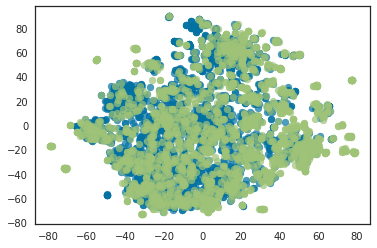

In [ ]:
# t-sne on training data
from yellowbrick.text import TSNEVisualizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X_train, y_train)

##Prediction

###3.KNN

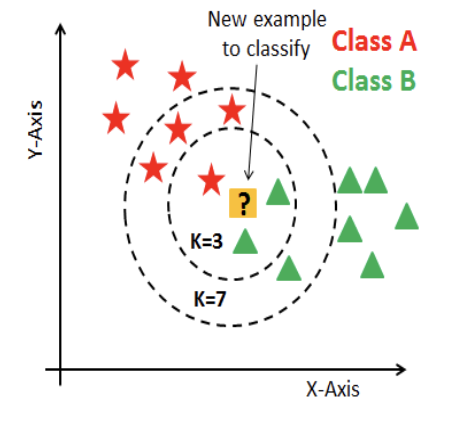

**Explanation**

The k-nearest neighbours (kNN) algorithm is a non-parametric technique used for classification purposes. 

As it is non-parametric, it does not generate any estimates on the distribution of the data, i.e. it does not generalize about the distribution.

Instead, it keeps all the training data in its classifier and predicts any observation of the test set based on proximity in the training set. This means that is compares such a test observation to the k-nearest observations in the training set. The prediction for the test observation is then determined by the class of the distance-adjusted majority of the nearest training datapoints.

Image source: https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

**Finding the right k**

To use the kNN classifier, first, the number of k nearest neighbours has to be chosen. Any natural number can be selcted for this, but usually, some numbers perform better than others. 

Finding the optimal number can be done by trying out many of them. There is no algorithmic solution.

We tried the the numbers 1-20 in a for loop. We obtained the best score for the k=3 which resulted in an accuracy of 0.66.

Text(0.5, 0, 'N')

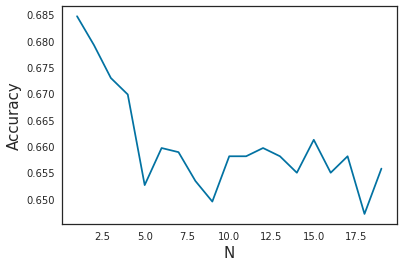

In [ ]:
scores = {}
for n in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    scores[n] = knn.score(X_test, y_test)

plt.plot([key for key in scores.keys()], [value for value in scores.values()])
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('N', fontsize=15)

In [ ]:
best_n = max(scores, key=scores.get)
print("Number of neighbours giving the highest accuracy: {}, Accuracy: {}".format(best_n, scores[best_n]))

Number of neighbours giving the highest accuracy: 1, Accuracy: 0.6846635367762128


In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_n)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.6846635367762128

###4.Decision trees

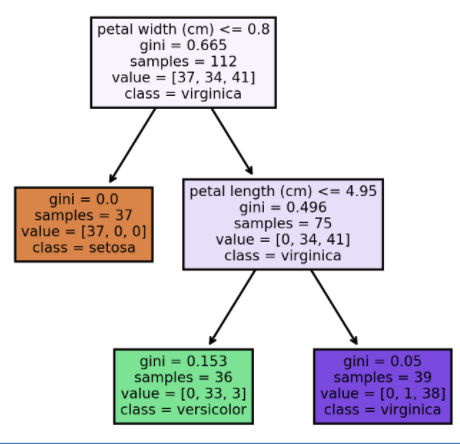

**Explanation**

The decision tree algorithm is also a non-parametric technique as is does not make any assumptions about the distribution of the data, i.e. is does not generalize about the distribution.

Instead, it builds regression models that divide the data in ever smaller parts, based on the regression. This creates a tree structure of divisions. The number of divisions determines the tree depth.

The advantage of this method is that is allows reconstruct and understand why the classifier predicted an item to one class or the other.

Image source: https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

**Finding the right depth**

As with k in kNN, the depth has to be specified in the beginning.

We automated this process with a for loop.

We set the maximal depth to 50 and obtained an accuracy of 0.71.

Text(0.5, 0, 'Depth')

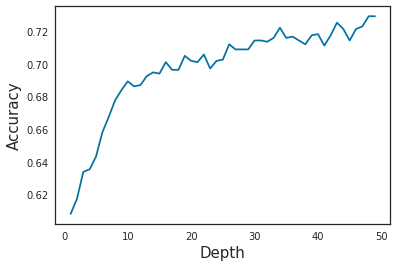

In [ ]:
scores = {}
for d in range(1, 50):
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    scores[d] = tree.score(X_test, y_test)
    
plt.plot([key for key in scores.keys()], [value for value in scores.values()])
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Depth', fontsize=15)

In [ ]:
best_d = max(scores, key=scores.get)
print("Max depth giving the highest accuracy: {}, Accuracy: {}".format(best_d, scores[best_d]))

Max depth giving the highest accuracy: 48, Accuracy: 0.729264475743349


#Conclusion
In this notebook we have tried different classifiers  in order to improve our prediction.

Unfortunately, we could see that accuracies we got are much lower than the ones we get with logistic regression.

Therefore, we did not submit these results.

Here are all accuracies :



| Model       | Vectorizer  | Test Accuracy  | Submission Accuracy  |
|----------------------|---------------------|---------|---------------|
| Logistic Regression without CV *(max_df=1.0,min_df=1, ngram_range=(1, 1))* |TF-IDF| 0,8083 |  0,803   |
| Logistic Regression with CV *(idem, ngram_range=(1, 1))*  |TF-IDF| 0,7895   |NaN  |
| Random Forest Classifier|TF-IDF| 0,7973 |NaN |       
| **Logistic Regression without CV (idem, ngram_range=(1, 2))**  |**TF-IDF** |**0,8099**  |**0,811**|
|----------------------|------------------|---------|---------------|
| LR additional cleaning without CV *(idem, ngram_range=(1, 2))* |TF-IDF | 0.7958 |NaN   |
| LR additional cleaning with CV *(idem, ngram_range=(1, 1))*  |TF-IDF   | 0.7879 |  NaN |
|----------------------|---------------------|---------|---------------|
| LR with Grid - Search *(C=1.623776739188721)* |TF-IDF |0.7934 | NaN  |
| LR with PCA *(components = 1000)*     |TF-IDF |0.7926*  |  NaN |
|----------------------|------------------|---------|---------------|
| KNN  *(n=1)*      |Count-vectorizer  |0,6847   | NaN  |
| Decision Trees *(depth=48)*     |Count-vectorizer  |0,7293   | NaN  |
|**We got different scores every time we ran the code, the max score was 0,7926*|

We have noticed that since we made additional cleaning, our accuracies have been decreasing. Therefore, we could not manange to beat one of the first score we got.

The efforst we did in the project are reresented below as a line graph with all test accuracies we got.

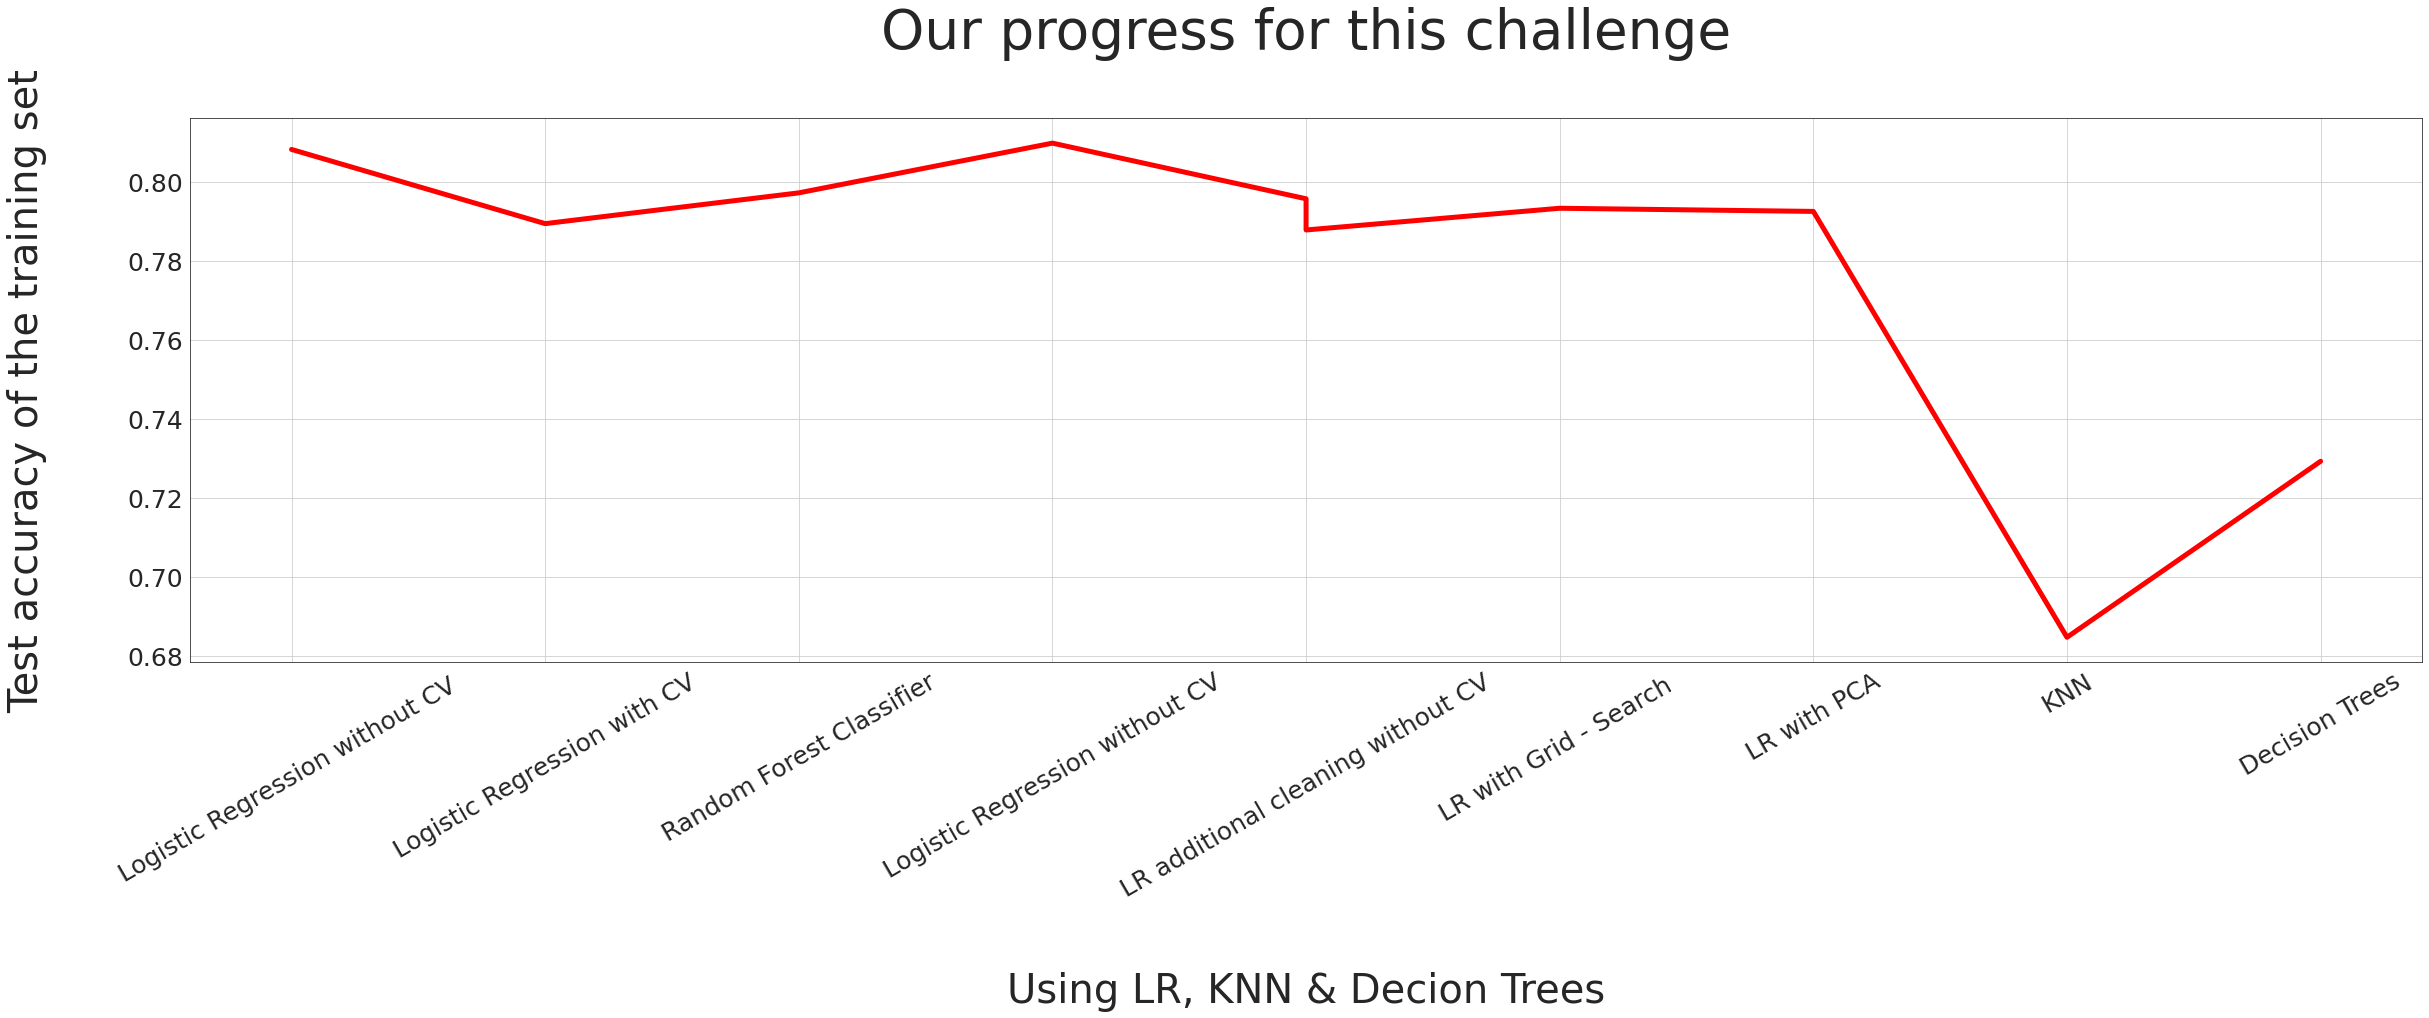

In [ ]:
models = ['Logistic Regression without CV ', 'Logistic Regression with CV', 'Random Forest Classifier','Logistic Regression without CV','LR additional cleaning without CV','LR additional cleaning without CV','LR with Grid - Search ','LR with PCA','KNN','Decision Trees']
values = [0.8083, 0.7895, 0.7973,0.8099, 0.7958, 0.7879,0.7934,0.7926, 0.6847 ,0.7293]

plt.figure(figsize=(40, 10))
plt.plot(models, values, linewidth=5.0, color='red')
plt.xlabel('Using LR, KNN & Decion Trees', size = 40,labelpad= 70)
plt.ylabel('Test accuracy of the training set',  size = 40, labelpad= 80)
plt.title('Our progress for this challenge', fontsize=55, pad = 70 )
plt.tick_params(labelsize=25)
plt.xticks(rotation=30)
plt.grid(True)

plt.show()

Moreover, there is a graph which only shows the test accuracies for a best performed classifier - **Logistic Regression**. The values are spread between 0.78 and 0.81.

In [ ]:
# Customize plots
%matplotlib inline
sns.set_theme(style="white")
plt.style.use('grayscale')

In [ ]:
#plt.style.available

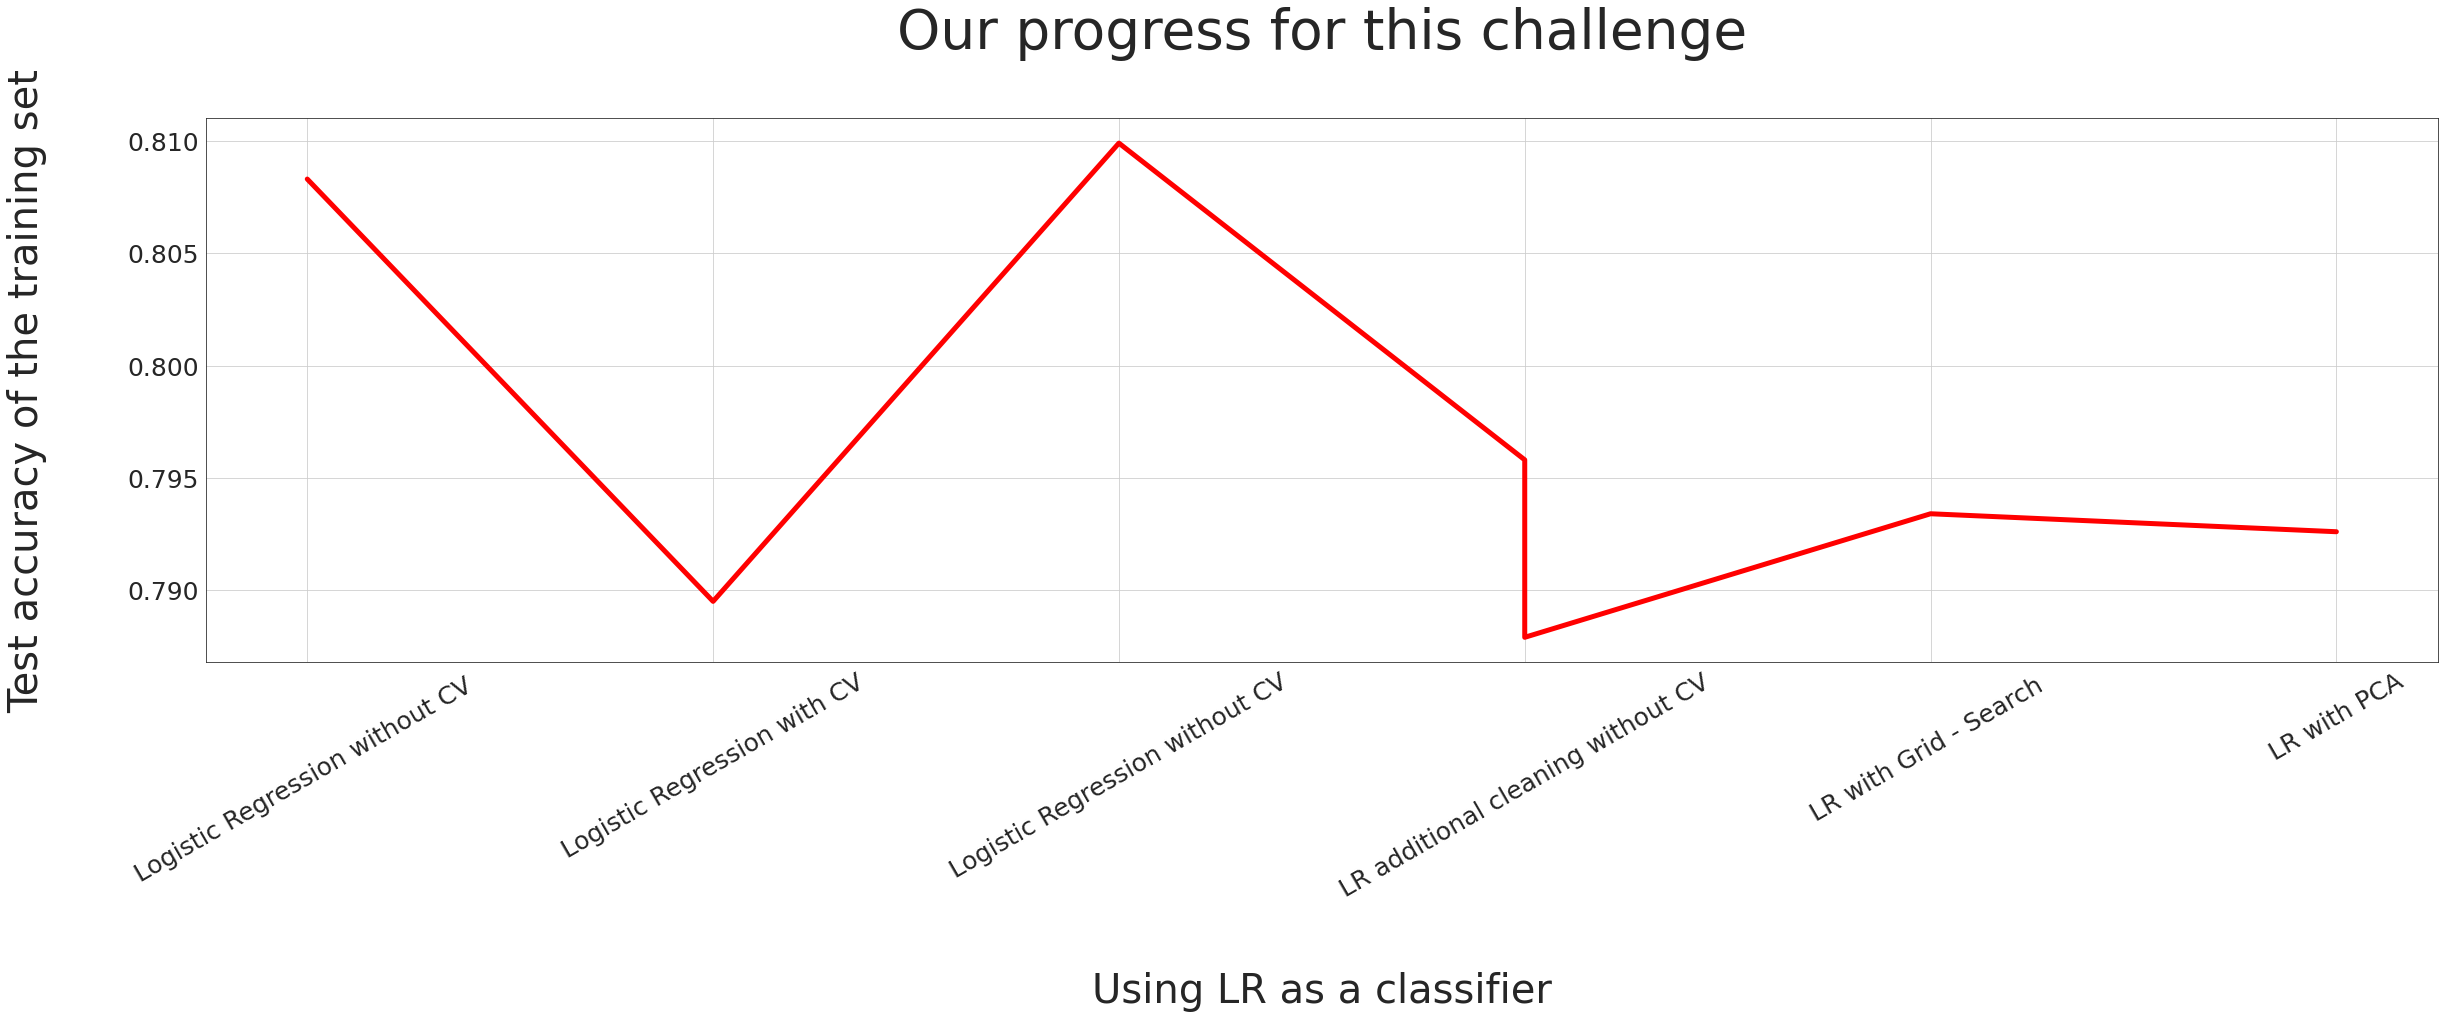

In [ ]:
models2 = ['Logistic Regression without CV ', 'Logistic Regression with CV', 'Logistic Regression without CV','LR additional cleaning without CV','LR additional cleaning without CV','LR with Grid - Search ','LR with PCA']
values2 = [0.8083, 0.7895,0.8099, 0.7958, 0.7879,0.7934,0.7926]

plt.figure(figsize=(40, 10))
plt.plot(models2, values2, linewidth=5.0, color='red')
plt.xlabel('Using LR as a classifier', size = 40,labelpad= 70)
plt.ylabel('Test accuracy of the training set',  size = 40, labelpad= 80)
plt.title('Our progress for this challenge', fontsize=55, pad = 70 )
plt.tick_params(labelsize=25)
plt.xticks(rotation=30)
plt.grid(True)

plt.show()

# Final Conclusion on the Project
Over the course of the last three weeks, we tried different techniques to predict which tweets were about real disasters and which were not. In this project, we worked iteratively. We did several approaches to clean the data better and tried different approaches to improve the prediction accuracy. Our first approach with basic data cleaning and linear regression with cross validation had the best accuracy.  With all the subsequent approaches, the accuracy score decreased. This can also be seen on the graph above which shows all our predictions and their respective accuracies. Looking back, the project gave us the opportunity to try out many methods, in particular many prediction classifiers. Still, it was a hard project as the accuracy did not increase when we applied better prediction techniques.